# Problem definition:
  - Automate the loan eligibility process (real time) based on customer detail provided while filling online application form

#### Project's librairies

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import chi2_contingency
from scipy.stats import chi2
import seaborn as sns
from scipy.stats import shapiro
from scipy.stats import pointbiserialr

1. ### Explore data:
  - **Data importation & Variable Identification**
  

In [2]:
data = pd.read_csv('/Users/macos/Desktop/train_ctrUa4K.csv')
data.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

In [3]:
categorical_features  = data[['Gender', 'Married', 'Dependents', 'Self_Employed', 'Property_Area']].copy()
numerical_features  = data[['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term']].copy()

 - **Univariate Analysis**
   - "CountinuousVariableExploration" class : initializer's takes a continuous variable and its name as arguments and provide methods to compute and visualize the **tendecy** and **spread** of the variable.


In [4]:
class CountinuousVariableExploration:
    
    def __init__(self, variable, name):
        self.variable = variable
        self.var_name = name
        
    def tendecy_measures(self):
        print("        TENDECY MEASURES")
        print("Mean :")
        print(self.variable.mean())
        print("Median :")
        print(self.variable.median())
        print("Mode :")
        print(self.variable.mode())
        print("Min :")
        print(self.variable.min())
        print("Max :")
        print(self.variable.max())
        
    def measure_of_dispersion(self):
        print("        DISPERSION MEASURE")
        print("Range")
        print(self.variable.max()-self.variable.min())
        print("Quantiles : ")
        print(self.variable.quantile([.25, .5, .75]))
        print("Interquantile range :")
        iqr = self.variable.quantile(.75)-self.variable.quantile(.25)
        print(iqr)
        print("Variance :")
        print(self.variable.var())
        print("Standard Deviation :")
        print(self.variable.std())
        print("Lower inner fence :")
        qar = list(self.variable.quantile([.25, .5, .75]))
        print(qar[0]-1.5*iqr)
        print("Upper inner fence :")
        print(qar[2]+1.5*iqr)
        print("Lower outer fence :")
        print(qar[0]-3*iqr)
        print("Upper outer fence :")
        print(qar[2]+3*iqr)
        print("\n")
        
    
    def variable_visualization(self):

        def split_to_quartiles_arrays(arr):
            vals = list(arr.quantile([.25, .5, .75]))
            quartiles = []
            quartiles.append(arr[arr<vals[0]])
            mask = (arr>vals[0]) & (arr<vals[1])
            quartiles.append(arr[mask])
            mask = (arr>vals[1]) & (arr<vals[2])
            quartiles.append(arr[mask])
            quartiles.append(arr[arr>vals[2]])
            return quartiles
        
        plt.hist(x=self.variable, bins=50, color='red', alpha=0.7, rwidth=0.85)
        plt.title(self.var_name)
        
        
        quartiles = split_to_quartiles_arrays(self.variable)
        fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2)
        fig.suptitle(self.var_name + ' quartiles histograms')
        ax1.hist(x=quartiles[0], bins=50, color='magenta', alpha=0.7, rwidth=0.85)
        ax2.hist(x=quartiles[1], bins=50, color='orange', alpha=0.7, rwidth=0.85)
        ax3.hist(x=quartiles[2], bins=50, color='orange', alpha=0.7, rwidth=0.85)
        ax4.hist(x=quartiles[3], bins=50, color='brown', alpha=0.7, rwidth=0.85)
        
        
    
    def conclusions(self):
        # Standard deviation : spread of the data from the mean
        # Normaly all of the data should be in the range [mean ±Standard deviation]
        # print the percentage of data that doesn't sit in this range
        mean = self.variable.mean()
        standard_deviation = self.variable.std()
        data_in_range = self.variable[(self.variable > mean-3*standard_deviation) & (self.variable < mean+3*standard_deviation)]
        print("{}% of data sit in the range(mean ± 3*standard_deviation) : [{}, {}]".format(len(data_in_range)/len(self.variable), mean-3*standard_deviation, mean+3*standard_deviation))
        qar = list(self.variable.quantile([.25, .5, .75]))
        iqr = qar[2]-qar[0]
        weak_outliers = self.variable[(self.variable > qar[0]-1.5*iqr) & (self.variable < qar[2]+1.5*iqr)]
        print("{}% of data are weak outliers".format(1 - len(weak_outliers)/len(self.variable)))
        strong_outliers = self.variable[(self.variable > qar[0]-3*iqr) & (self.variable < qar[2]+3*iqr)]
        print("{}% of data are strong outliers".format(1 - len(strong_outliers)/len(self.variable)))

        TENDECY MEASURES
Mean :
5403.459283387622
Median :
3812.5
Mode :
0    2500
dtype: int64
Min :
150
Max :
81000
        DISPERSION MEASURE
Range
80850
Quantiles : 
0.25    2877.5
0.50    3812.5
0.75    5795.0
Name: ApplicantIncome, dtype: float64
Interquantile range :
2917.5
Variance :
37320390.167181164
Standard Deviation :
6109.041673387174
Lower inner fence :
-1498.75
Upper inner fence :
10171.25
Lower outer fence :
-5875.0
Upper outer fence :
14547.5




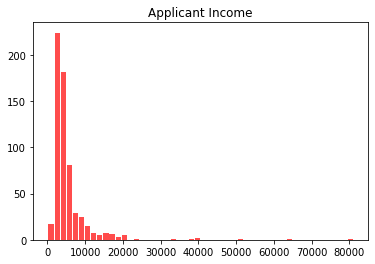

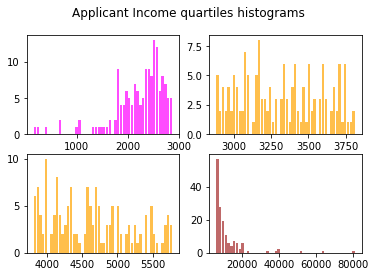

In [5]:
continuous_exploration = CountinuousVariableExploration(data.ApplicantIncome, 'Applicant Income')
continuous_exploration.tendecy_measures()
continuous_exploration.measure_of_dispersion()
continuous_exploration.variable_visualization()

   - "CategoricalVariableExploration" class : initializer's takes a ordinal variable and its name as arguments and  visualizes(count) the variable.

In [6]:
class CategoricalVariableExploration:
    
    def __init__(self, variable, variable_name):
        self.variable = variable
        self.variable_name = variable_name
        
    
    def variable_visualization(self):
        bar = self.variable.value_counts().plot.bar()
        bar.title.set_text("{}'s Bar chart".format(self.variable_name))

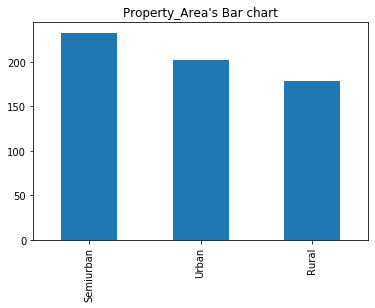

In [7]:
categorical = CategoricalVariableExploration(data.Property_Area, "Property_Area")
categorical.variable_visualization()

 - **Bivariate Analysis**
   - **Continuous & continuous**


In [8]:
class COOCBIVARIATE:
    
    def __init__(self, var1, var2, var1_name="", var2_name =""):
        self.var1 = var1
        self.var2 = var2
        self.var1_name = var1_name
        self.var2_name = var2_name
        
    
    def scatter_vars(self):
        plt.scatter(self.var1, self.var2)
        plt.xlabel(self.var1_name)
        plt.ylabel(self.var2_name)
        plt.show()
       
    def shapiro_wilks(self, var):#test if a variable is normaly dstributed
        is_normally_disributed = False
        stat, p = shapiro(var)
        print('Statistics=%.3f, p=%.3f' % (stat, p))
        # interpret
        alpha = 0.05
        if p > alpha:
            is_normally_disributed = True
#             print('Sample looks Gaussian (fail to reject H0)')
            print("Variable is normally distributed")
        else:
#             print('Sample does not look Gaussian (reject H0)')
            print("Variable is not normally distributed")
        return is_normally_disributed
    
    def pearson_correlation(self):
        pearson = None
        var1_is_normally_distributed = self.shapiro_wilks(self.var1)
        var2_is_normally_distributed = self.shapiro_wilks(self.var2)
        if(var1_is_normally_distributed and var2_is_normally_distributed):
            pearson = self.var1.corr(self.var2, method ='pearson')   
        else:
            print("Note that For the Pearson r correlation, both variables should be normally distributed.")
            print("And {} or {} is not normally distributed".format(self.var1_name, self.var2_name))
        return pearson
    
    
    def spearsman_correlation(self):
        pass
    
    def heat_map(self, data):
        cor = data.corr()
        plt.figure(figsize=(10, 6))
        sns.heatmap(cor, annot=True)
        
        
    def conclusions(self):
        corr = self.pearson_correlation()   
        if corr:
            print("Pearson's correlation {}".format(corr))
            if corr <=-1 and corr >=-0.5:
                print("Strong negative linear relationship between {} and {}".format(self.var1_name, self.var2_name))
            elif corr>=0.5 and corr<=1:
                print("Strong positive linear relationship between {} and {}".format(self.var1_name, self.var2_name))
            else :
                print("No !!! LINEAR !!! relationship between {} and {}".format(self.var1_name, self.var2_name))
        else:
            print("Variables are not normally distributed to conclude anythin")

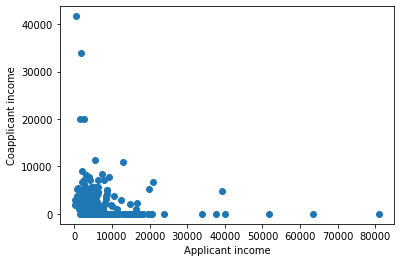

Statistics=0.471, p=0.000
Variable is not normally distributed
Statistics=0.482, p=0.000
Variable is not normally distributed
Note that For the Pearson r correlation, both variables should be normally distributed.
And Applicant income or Coapplicant income is not normally distributed
Variables are not normally distributed to conclude anythin


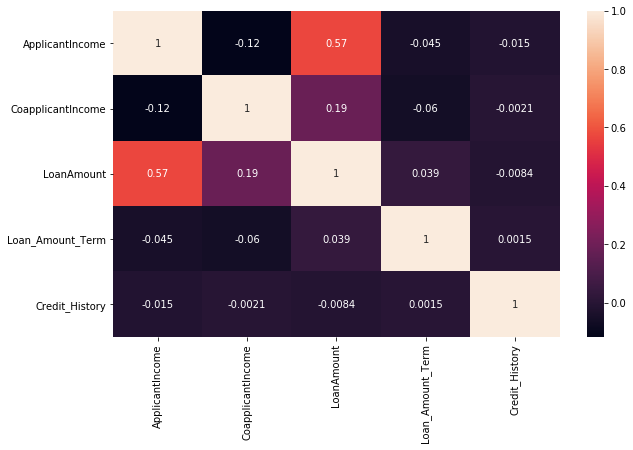

In [9]:
cv  = COOCBIVARIATE(data.ApplicantIncome, data.CoapplicantIncome, "Applicant income", "Coapplicant income")
cv.scatter_vars()
cv.conclusions()
cv.heat_map(data)

   - **Categorical and categorical**

In [10]:
class CAACBIVARIATE:
    
    def __init__(self, var1, var2, var1_name="", var2_name =""):
        self.var1 = var1
        self.var2 = var2
        self.var1_name = var1_name
        self.var2_name = var2_name
      
    
    def chi_square(self, prob = 0.95):
        # Assumptions : - Your categorical variable should be dichotomous 
        # - Contingency coefficient C cannot be used to compare associations among tables 
        # with different numbers of categories or in tables with a mix of categorical and continuous variables
        are_dependent = False
        cross_tab = pd.crosstab(self.var1, self.var2)
        stat, p, dof, expected = chi2_contingency(cross_tab)
        # interpret test-statistic
        critical = chi2.ppf(prob, dof)
#         print('probability = %.3f, critical = %.3f, stat = %.3f' % (prob, critical, stat))
        if abs(stat) >= critical:
#             print('{} & {} are Dependent'.format(self.var1_name, self.var2_name))
            are_dependent = True
#         else:
#             print('{} & {} are Independent'.format(self.var1_name, self.var2_name))
        # interpret p-value
#         alpha = 1.0 - prob
#         print('significance=%.3f, p=%.3f' % (alpha, p))
#         if p <= alpha:
#             print('{} & {} are Dependent'.format(self.var1_name, self.var2_name))
#         else:
#             print('{} & {} are Independent'.format(self.var1_name, self.var2_name))
            
        return are_dependent
    
    def fisher_score(self):
        pass
    
    def crosstab(self):
        cross_tab = pd.crosstab(self.var1, self.var2)
        print(cross_tab)
        cross_tab.plot(kind='bar', stacked=True, color=['red','blue'], grid=False)
        
    def select_relevant_features(self, response_field, categorical_features):
        self.var1 = response_field
        self.var1_name = response_field.name
        tab = []
        for feature in categorical_features:
            self.var2 = categorical_features[feature]
            self.var2_name = feature
            are_dependent = self.chi_square()
            dic = {
                'Feature' : self.var2_name,
                'Is_dependent_to_target' : are_dependent
            }
            tab.append(dic)
        return tab

In [11]:
class COACVARIATE:
    
    def __init__(self, var1, var2, var1_name="", var2_name =""):
        self.var1 = var1
        self.var2 = var2
        self.var1_name = var1_name
        self.var2_name = var2_name
    
#     def kendall_correlation(self):
# #         print(self.var2.unique())
#         kendall_coeff = self.var1.corr(self.var2, method ='kendall') 
#         print(kendall_coeff)
        
    def point_biserial_correlation(self):
        # Assumptions : - Your continuous variable should be approximately 
        # NORMALLY distributed for ""each category"" of the dichotomous variable "WE CAN SEE IF WE CAN NORMALIZE THE DATA"
        # - Your continuous variable should have equal variances 
        # for each category of the dichotomous variable
#         continuous_first_category  = 
#         countinuous_second_category = 
#         if (continuous_first_category is normaly_distributed) and (continuous_second_category is normaly_distributed)
#             and (len(self.var1.unique()) == 2)
#             print("Ok")
# #             corr = pointbiserialr(self.var1, self.var2)
# #             correlation_conclusion(corr, self.var1_name, self.var2_name)
#         else:
#             print("Point biserial correlation measure the concordance of a NORMALLY distributed continuous variable and DICHOTOMOUS variable")

    def logistic_regression(self):
        pass

### Data preperation
   - Select best features
   - Identify outliers
   - Deal with NULL data

In [12]:
### Response field is a categorical field


In [13]:
categorical_features.columns

Index(['Gender', 'Married', 'Dependents', 'Self_Employed', 'Property_Area'], dtype='object')

In [14]:
categorical_features_selection = CAACBIVARIATE(data.Loan_Status, categorical_features.Gender)
result = categorical_features_selection.select_relevant_features(data.Loan_Status, categorical_features)
result

[{'Feature': 'Gender', 'Is_dependent_to_target': False},
 {'Feature': 'Married', 'Is_dependent_to_target': True},
 {'Feature': 'Dependents', 'Is_dependent_to_target': False},
 {'Feature': 'Self_Employed', 'Is_dependent_to_target': False},
 {'Feature': 'Property_Area', 'Is_dependent_to_target': True}]

In [15]:
loan = data.Loan_Status.copy()
loan.map({'Y':1, 'N':0})
continous_categ_bivariation = COACVARIATE(loan, data.ApplicantIncome)
continous_categ_bivariation.kendall_correlation()
loan.head()
loan.value_counts()

-0.0034032114855465654


Y    422
N    192
Name: Loan_Status, dtype: int64

//anaconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:824: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
//anaconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:825: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


(array([ 2.,  7., 14., 17., 32., 32., 68., 74., 88., 48., 52., 22., 44.,
        14., 11.,  6.,  6.,  7.,  9.,  5.,  4.,  5.,  3.,  1.,  2.,  1.,
         3.,  0.,  2.,  0.,  1.,  0.,  0.,  0.,  4.,  3.,  0.,  0.,  0.,
         0.,  1.,  0.,  2.,  0.,  0.,  0.,  1.,  0.,  0.,  1.]),
 array([  9.  ,  22.82,  36.64,  50.46,  64.28,  78.1 ,  91.92, 105.74,
        119.56, 133.38, 147.2 , 161.02, 174.84, 188.66, 202.48, 216.3 ,
        230.12, 243.94, 257.76, 271.58, 285.4 , 299.22, 313.04, 326.86,
        340.68, 354.5 , 368.32, 382.14, 395.96, 409.78, 423.6 , 437.42,
        451.24, 465.06, 478.88, 492.7 , 506.52, 520.34, 534.16, 547.98,
        561.8 , 575.62, 589.44, 603.26, 617.08, 630.9 , 644.72, 658.54,
        672.36, 686.18, 700.  ]),
 <a list of 50 Patch objects>)

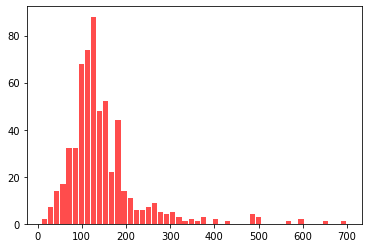

In [16]:
plt.hist(x=data.LoanAmount, bins=50, color='red', alpha=0.7, rwidth=0.85)

In [17]:
attention = COOCBIVARIATE(data.ApplicantIncome, data.CoapplicantIncome)

(array([  6.,  91., 134.,  65.,  47.,  18.,  13.,  15.,   5.,   2.,   3.,
          5.,   3.,   5.,   1.,   2.,   1.,   0.,   1.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   1.,   1.,   1.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   1.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   1.]),
 array([  210.  ,  1472.54,  2735.08,  3997.62,  5260.16,  6522.7 ,
         7785.24,  9047.78, 10310.32, 11572.86, 12835.4 , 14097.94,
        15360.48, 16623.02, 17885.56, 19148.1 , 20410.64, 21673.18,
        22935.72, 24198.26, 25460.8 , 26723.34, 27985.88, 29248.42,
        30510.96, 31773.5 , 33036.04, 34298.58, 35561.12, 36823.66,
        38086.2 , 39348.74, 40611.28, 41873.82, 43136.36, 44398.9 ,
        45661.44, 46923.98, 48186.52, 49449.06, 50711.6 , 51974.14,
        53236.68, 54499.22, 55761.76, 57024.3 , 58286.84, 59549.38,
        60811.92, 62074.46, 63337.  ]),
 <a list of 50 Patch objects>)

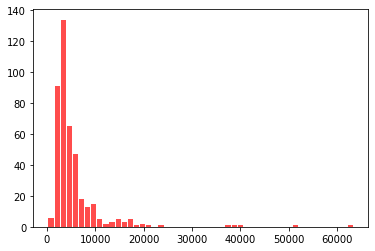

In [18]:
data_copy = data.copy()
data_copy = data_copy[data_copy.Loan_Status =='Y']
plt.hist(x=data_copy.ApplicantIncome, bins=50, color='red', alpha=0.7, rwidth=0.85)

(array([ 8., 64., 61., 26.,  7.,  6.,  7.,  4.,  1.,  2.,  0.,  1.,  3.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.]),
 array([  150.,  1767.,  3384.,  5001.,  6618.,  8235.,  9852., 11469.,
        13086., 14703., 16320., 17937., 19554., 21171., 22788., 24405.,
        26022., 27639., 29256., 30873., 32490., 34107., 35724., 37341.,
        38958., 40575., 42192., 43809., 45426., 47043., 48660., 50277.,
        51894., 53511., 55128., 56745., 58362., 59979., 61596., 63213.,
        64830., 66447., 68064., 69681., 71298., 72915., 74532., 76149.,
        77766., 79383., 81000.]),
 <a list of 50 Patch objects>)

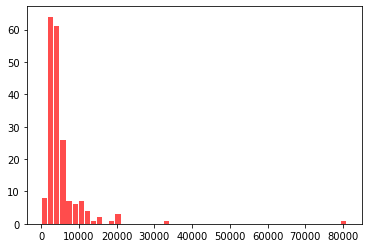

In [19]:
data_copy = data.copy()
data_copy = data_copy[data_copy.Loan_Status =='N']
plt.hist(x=data_copy.ApplicantIncome, bins=50, color='red', alpha=0.7, rwidth=0.85)

In [21]:
def correlation_conclusion(corr, var1_name, var2_name):
    if corr <=-1 and corr >=-0.5:
        print("Strong negative linear relationship between {} and {}".format(var1_name, var2_name))       
    elif corr>=0.5 and corr<=1:
        print("Strong positive linear relationship between {} and {}".format(var1_name, var2_name))
    else :
        print("No !!! LINEAR !!! relationship between {} and {}".format(var1_name, var2_name))

In [29]:
ser_1 = pd.Series([True, True, False, True, True, False])
ser_2 = pd.Series([False, True, True, False, True, True])
data = pd.DataFrame({'serie_1':ser_1, 'serie_2':ser_2})

In [32]:
mask = data.serie_1 & data.serie_2

In [34]:
new_data = data[mask]

In [46]:
table = np.full(10, True)

In [47]:
table

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True])

In [42]:
tu

array([ True,  True, False,  True,  True, False])